# Impact Potential Analysis of Water-Use Efficiency

Water scarcity is - in different ways - a higly important social, economical and environmental issue. Both, societies and companies depend on water and a healthy planet to provide the fresh water. Freshwater systems are directly threatened by human activities. However, water related risks seem to have less priority in the current public discussion than other, more well-known risks such as climate change. Therefore, we want to bring attention to water related topics in this analysis by developing a new key performance indicator (KPI) for this purpose. This metric evaluates the positive impact potential a corporate facility can have by improving its water-use efficiency in a water stressed area. The metric analyses the water stress level from a local point of view instead from a country point of view since water stress level can strongly vary within a country.

The key findings are:
* The impact potential KPI is able to provide more insight than only analysing a facility's water-use efficiency
* The impact potential KPI could be used as an extention of the water-use efficiency metric
* Corporations with low water-use efficiency or high impact potential are already taking actions by including water related targets in their targets/goals
* In general, knowledge and awareness of water related risks, such as water stress, can be increased

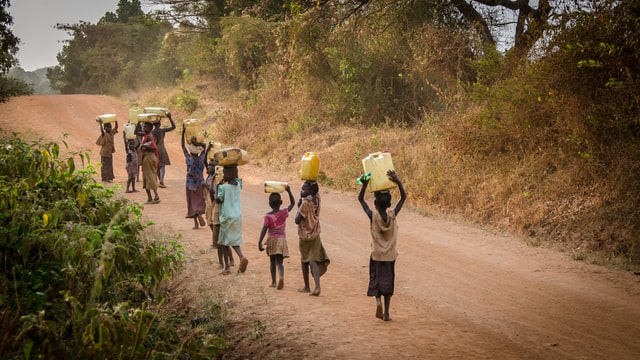
<span>Photo by <a href="https://unsplash.com/@ackley5?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Jeff Ackley</a> on <a href="https://unsplash.com/s/photos/africa-water-people?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

# Introduction

Although 2/3 of the surface of the earth is covered in water, it can be observed that water is (a) not equally distributed across the surface of the earth and (b) that the quality/condition of water determines its usefulness to humans. Water is one of the most essential resources on this planet and is vital to all forms of life. Despite this fact, water scarcity is a harsh reality which 80% of the world’s population is already experiencing today [3] and even more are expected to be affected by it in the future. The United Nations dedicate one of the 17 Sustainable Development Goals („SDGs“) to "Clean Water and sanitation“ [1].

Water scarcity is created where the water withdrawal from a basin exceeds its recharge. On the one side of the equation, places with rapid population growth or water intensive industry, such as agriculture or energy tend to have high demand for water.  On the other side of the equation, low rainfall or insufficient infrastructure lead to low water supply. Over 1.7 billion people are currently living in river basins where water use exceeds recharge [1]. While rich nations might be able to invest in water technology that offsets high stressor levels without remedying their underlying causes, less wealthy nations remain vulnerable [3].

**Water scarcity is both a social issue and an environmental issue. Water is at the heart of basic human security because we need it for food, sanitation, health and energy.** Especially, the COVID19 pandemic has shown the importance of sanitation for preventing diseases. The Impact of COVID should be considerably higher on the urban poor living in slums, who don’t have access to clean water [1]. 3 billion people world wide lack basic hand-washing facilities at home [1]. Therefore, water scarcity could displace 700 million people by 2030 [5]. **On the other hand, water is not only important for humans but for other living organisms on this planet. Therefore, responsible resource use and consumption is an important aspect of water scarcity. Although societies cannot succeed and companies cannot create long-term value without a healthy planet to provide the fresh water, freshwater systems are directly threatened by human activities** [3, 4]. Therefore, we need to establish a responsible use of our water supplies to both tackle the social and environmental issues. Hence, there is a necessity to establish a responsible usage of the earth’s water resources. For this purpose a metric is developed which is looking into a company’s water-use efficiency in the context of its local water stress level. Depending on these variables the impact potential of an increased water-use efficiency of each individual facility is calculated.

# Related Work

The aim of this analysis is to develop a metric to monitor and manage our water demand and water supply to reduce the risk of water scarcity. Although, currently there is no standard established yet, many metrics have already been proposed. In the following, we will first become familiar with already available metrics regarding water related issues.

When it comes to water usage, three main quantitative metrics have to be considered: **Water withdrawal** describes the total amount of water abstracted from freshwater sources for agricultural, domestic and industrial uses. Water discharge describes the amount of water returned after the withdrawal. **Water consumption** is the difference between withdrawn water and discharged water. It is the proportion of water abstracted from freshwater sources that is no longer available for downstream use due to evaporation or incorporation into a product. Based on the above, one indicator proposed in the SDG is the **change in water-use efficiency over time** where water-use efficiency is the ratio between consumed water and withdrawn water [1].

Another set of metrics focuses on geographical aspects. One metric is the freshwater withdrawal as a proportion of available freshwater resources, which is called the level of water stress [4, 1]. Furthermore, Vörösmarty et al. [2] suggest that context-oriented metrics can help uncover counter-intuitive results. The context has to consider output, outcome and impact equally. The World Economic Forum (WEF) [4] is suggesting to combine the water quantity metrics with the geographical metrics and proposes to monitor **water consumption and withdrawal in water-stressed areas**. This way, water withdrawal at the cost of others such as residents or other industries can be monitored. 

# Methodology

The objective of this analysis is to develop a key performance indicator (KPI) of the impact of water consumption. Our approach combines the metrics proposed by the SDG [1], WEF [4] and Vörösmarty et al. [2]. **The result is an impact potential based on the water-use efficiency according to the local water stress level.** The underlying idea is that a **company in a region with higher water stress level has a higher potential of making a positive impact** by increasing their water-use efficiency than a company operating in a region with lower water stress level. The developed KPI allows for a comparison of corporate facilities’ impact potential on a global scale taking into account the regional characteristic of water stress level.

## Fundamentals
For this purpose, **water-use efficiency** is defined as a facility’s amount of consumed water in proportion to the amount of withdrawn water. Withdrawn water is the total amount of water abstracted from freshwater sources and consumed water is the amount of withdrawn water that is no longer available for downstream use. The water-use efficiency ranges between 0 (worst efficiency level) and 1 (highest efficiency level).

Water-Use Efficiency $ \eta = \dfrac{\text{Withdrawn Water - Consumed Water}}{\text{Withdrawn Water}}$

Secondly, **water stress level** is the freshwater withdrawal as a proportion of available freshwater resources. Below figure shows the water stress levels on a country-wise level from the [Aqueduct Map](https://www.wri.org/aqueduct). Water stress level as defined in the mentioned dataset ranges from 0 to 5 with 0 being the best and 5 being the worst. For the following analysis, we will scale the water stress level to 0 and 1 similarly as the water-use-efficiency, with 0 being the lowest water stress level (best outcome) and 1 being the highest water stress level (worst outcome).


In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Libraries for numerical alculations
import numpy as np # linear algebra
from math import radians, cos, sin, asin, sqrt

from tqdm import tqdm

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, RegularPolygon
from mpl_toolkits.basemap import Basemap

import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore')

import re

In [ ]:
water_stress_df = pd.read_csv('../input/aqueduct-global-water-stress-data-maps-30-data/y2019m07d11_aqueduct30_annual_v01.csv')
water_stress_df_mod = water_stress_df[['name_0', 'name_1', 'bws_score']][((water_stress_df.name_0 != '-9999') & (water_stress_df.name_1 != '-9999') & (water_stress_df.bws_score != -9999))]
water_stress_df_mod = water_stress_df_mod.drop_duplicates()
water_stress_df_mod.columns = ['country', 'area', 'water_stress_level']

water_stress_df_mod['water_stress_level_norm'] = water_stress_df_mod['water_stress_level'] / 5

water_stress_level_by_country = water_stress_df_mod.groupby(['country']).water_stress_level_norm.mean().to_frame().reset_index(drop=False)

fig = make_subplots(rows=1, cols=1, specs = [[{'type': 'choropleth'} for c in np.arange(1)] for r in np.arange(1)],
                    subplot_titles = ["Water Stress Level by Country"])

fig.add_trace(go.Choropleth(locations = water_stress_level_by_country.country,
                            z = water_stress_level_by_country.water_stress_level_norm,
                            zmax=1,
                            locationmode = 'country names',
                            colorscale=px.colors.sequential.YlOrRd),
              row = 1, col = 1)


Below figure shows the **importance of a fine-grained view of the water stress level**. For example, the United States have a medium water stress level from a national point of view. However, by only looking at the water stress level state-wise, it is obvious that depending on the local region, the water stress levels can vary strongly.

In [ ]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

water_stress_df_mod_us = water_stress_df_mod[water_stress_df_mod.country == 'United States'].copy()
water_stress_df_mod_us['area'] = water_stress_df_mod_us['area'].replace(us_state_abbrev)
water_stress_df_mod_us = water_stress_df_mod_us.groupby(['area', ]).water_stress_level_norm.mean().to_frame().reset_index(drop=False)


fig = go.Figure()
layout = dict(
    title_text = "Water Stress Level by State in the United States of America",
    geo_scope='usa',
)

fig.add_trace(
    go.Choropleth(
        locations=water_stress_df_mod_us.area,
        zmax=1,
        z = water_stress_df_mod_us.water_stress_level_norm,
        locationmode = 'USA-states', # set of locations match entries in `locations`
        marker_line_color='white',
        geo='geo',
        colorscale=px.colors.sequential.YlOrRd, 
        
    )
)
            
fig.update_layout(layout)   
fig.show()

## KPI: Impact Potential
The following figure shows two sample facilities. Both facilities have a water-use efficiency of 0.5. However, facility A is located in an area with lower water stress level than facility B.

In [ ]:
facility_A = np.array([0.5, 0.3])
facility_B = np.array([0.5, 0.7])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

ax.scatter(facility_A[0], facility_A[1], color='black', marker = 'o')
ax.annotate('Facility A', (facility_A * 1.05), fontsize=12)
ax.scatter(facility_B[0], facility_B[1], color='black', marker = 'o')
ax.annotate('Facility B', (facility_B * 1.05), fontsize=12)

ax.set_xlabel('Water-Use Efficiency', fontsize= 14)
ax.set_xlim([-0.01, 1.05])
ax.set_ylabel('Normed Water Stress Level', fontsize= 14)
ax.set_ylim([-0.01, 1.05])
ax.imshow([[0.5,1],[0,0.5]], cmap='RdYlGn', interpolation='bilinear')

plt.show()



As shown on the left in below figure, both facilities have an improvement potential of 0.5 for their water-use efficiency. However, if only the water-use efficiency is analyzed as a KPI, we could not see that the impact of facility B improving their water-use efficiency is greater than if facility A improved their water-use efficiency. 

Therefore, we have developed a metric to incorporate the local water stress level to improve the assessment of a facility’s impact potential as shown on the right in below figure. **The impact potential is represented by the altitude of the triangle created by the  three points (0,0), (`current_water_use_efficiency`, `local_water_stress_level`), (`ideal_water_use_efficiency`, `local_water_stress_level`)**.




Impact Potential = $\dfrac{\sqrt{s\cdot(s-d_1)\cdot(s-d_2)\cdot(s-d_3)}}{0.5 \cdot d_3} $ 




* Distance (0,0) to ($\eta$, ws): $d_1 = \sqrt{\eta^2 + ws^2}$
* Distance ($\eta$, ws) to ($\eta_{ideal}$, ws): $d_2 = \eta_{ideal} - \eta$
* Distance (0,0) to ($\eta_{ideal}$, ws): $d_3 = \sqrt{\eta_{ideal}^2 + ws^2}$
* Heron's theorem $s = \dfrac{(d_1 + d_2 + d_3)}{2}$ 
* Local water stress level $ws$
* Facilitie's current water-use efficiency $\eta$
* Ideal water-use efficiency $\eta_{ideal} = 1$

In [ ]:
def calculate_impact_potential(current_water_efficiency, local_water_stress_level):
    ideal_water_efficiency =  1

    a = sqrt(current_water_efficiency**2 + local_water_stress_level**2)
    b = ideal_water_efficiency - current_water_efficiency
    base = sqrt(ideal_water_efficiency**2 + local_water_stress_level**2)

    # Heron's formula to calculate the area
    s = (a + b + base) / 2
    area = sqrt(s*(s-a)*(s-b)*(s-base))

    # area = 0.5 * base * height -> height = area / (0.5 * base)
    height = area / (0.5 * base)
    
    # Normalize
    return round(height, 3) # Round

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

# Improvement Potential of Water-Use Efficiency
ax[0].scatter(facility_A[0], facility_A[1], color='midnightblue', marker = 'o')
ax[0].scatter(facility_B[0], facility_B[1], color='deepskyblue', marker = 'o')

ideal_water_use_efficiency =  1
ax[0].scatter(ideal_water_use_efficiency, facility_A[1], color='midnightblue', marker = '*', s=100)
ax[0].arrow(facility_A[0]+0.05, facility_A[1], 0.4, 0, length_includes_head=True, head_width=0.02, head_length=0.02, color='midnightblue')
ax[0].annotate(f'Improvement Potential A\n{ideal_water_use_efficiency - facility_A[0]}', (facility_A[0], facility_A[1] + 0.05), fontsize=12)
ax[0].scatter(ideal_water_use_efficiency, facility_B[1], color='deepskyblue', marker = '*', s=100)
ax[0].arrow(facility_B[0]+0.05, facility_B[1], 0.4, 0, length_includes_head=True, head_width=0.02, head_length=0.02, color='deepskyblue')
ax[0].annotate(f'Improvement Potential B\n{ideal_water_use_efficiency - facility_B[0]}', (facility_B[0], facility_B[1] + 0.05), fontsize=12)

ax[0].set_title('Improvement Potential of Water-Use Efficiency', fontsize= 16)
ax[0].set_xlabel('Water-Use Efficiency', fontsize= 14)
ax[0].set_xlim([-0.01, 1.05])
ax[0].set_ylabel('Normed Water Stress Level', fontsize= 14)
ax[0].set_ylim([-0.01, 1.05])

# Impact Potential
ax[1].scatter(facility_A[0], facility_A[1], color='midnightblue', marker = 'o')
ax[1].scatter(facility_B[0], facility_B[1], color='deepskyblue', marker = 'o')

ideal_water_use_efficiency =  1
ax[1].scatter(ideal_water_use_efficiency, facility_A[1], color='midnightblue', marker = '*', s=100)
ax[1].scatter(ideal_water_use_efficiency, facility_B[1], color='deepskyblue', marker = '*', s=100)

ax[1].plot([0, facility_A[0]], [0, facility_A[1]], linestyle='--', color='midnightblue')
ax[1].plot([0, ideal_water_use_efficiency], [0, facility_A[1]], linestyle='--', color='midnightblue')
ax[1].plot([facility_A[0], facility_A[0]+0.035], [facility_A[1], facility_A[1]-0.14], color='midnightblue', linewidth=4)
ax[1].annotate(f'Impact Potential A\n{calculate_impact_potential(facility_A[0], facility_A[1])}', (facility_A[0]+ 0.05, facility_A[1] - 0.05), fontsize=12)


ax[1].plot([0, facility_B[0]], [0, facility_B[1]], linestyle='--', color='deepskyblue')
ax[1].plot([0, ideal_water_use_efficiency], [0, facility_B[1]], linestyle='--', color='deepskyblue')
ax[1].plot([facility_B[0], facility_B[0]+0.15], [facility_B[1], facility_B[1]-0.24], color='deepskyblue', linewidth=4)
ax[1].annotate(f'Impact Potential B\n{calculate_impact_potential(facility_B[0], facility_B[1])}', (facility_B[0] + 0.05, facility_B[1] - 0.05), fontsize=12)

ax[1].set_title('Impact Potential', fontsize= 16)
ax[1].set_xlabel('Water-Use Efficiency', fontsize= 14)
ax[1].set_xlim([-0.01, 1.05])
ax[1].set_ylabel('Normed Water Stress Level', fontsize= 14)
ax[1].set_ylim([-0.01, 1.05])

plt.show()

The proposed approach is effective as follows: As shown on the left in below figure, we can see that a facility operating in an area with a higher water stress level has a higher impact potential than a facility operating in an area with lower water stress level, if both facilities have the same water-use efficiency. Additionally, as shown on the right in below figure, a facility with lower water-use efficiency has a higher impact potential than a facility with a higher water-use efficiency in the same area. Additionally, this approach is simple to calculate and visually easy to understand.

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Impact Potential
facility_A = np.array([0.5, 0.3])
facility_B = np.array([0.5, 0.7])
ax[0].scatter(facility_A[0], facility_A[1], color='midnightblue', marker = 'o')
ax[0].scatter(facility_B[0], facility_B[1], color='deepskyblue', marker = 'o')

ax[0].scatter(ideal_water_use_efficiency, facility_A[1], color='midnightblue', marker = '*', s=100)
ax[0].scatter(ideal_water_use_efficiency, facility_B[1], color='deepskyblue', marker = '*', s=100)

ax[0].plot([0, facility_A[0]], [0, facility_A[1]], linestyle='--', color='midnightblue')
ax[0].plot([0, ideal_water_use_efficiency], [0, facility_A[1]], linestyle='--', color='midnightblue')
ax[0].plot([facility_A[0], facility_A[0]+0.035], [facility_A[1], facility_A[1]-0.14], color='midnightblue', linewidth=4)
ax[0].annotate(f'Impact Potential\n{calculate_impact_potential(facility_A[0], facility_A[1])}', (facility_A[0]+ 0.05, facility_A[1] - 0.05), fontsize=12, color='midnightblue')

ax[0].plot([0, facility_B[0]], [0, facility_B[1]], linestyle='--', color='deepskyblue')
ax[0].plot([0, ideal_water_use_efficiency], [0, facility_B[1]], linestyle='--', color='deepskyblue')
ax[0].plot([facility_B[0], facility_B[0]+0.15], [facility_B[1], facility_B[1]-0.24], color='deepskyblue', linewidth=4)
ax[0].annotate(f'Impact Potential\n{calculate_impact_potential(facility_B[0], facility_B[1])}', (facility_B[0] + 0.05, facility_B[1] - 0.05), fontsize=12, color='deepskyblue')

ax[0].set_title(r"$\bf{Same}$" + ' Water-Use Efficiency \nin ' + r"$\bf{Different}$" + ' Water Stress Levels', fontsize= 16)
ax[0].set_xlabel('Water-Use Efficiency', fontsize= 14)
ax[0].set_xlim([-0.01, 1.05])
ax[0].set_ylabel('Normed Water Stress Level', fontsize= 14)
ax[0].set_ylim([-0.01, 1.05])

# Impact Potential
facility_A = np.array([0.5, 0.3])
facility_B = np.array([0.8, 0.3])

ax[1].scatter(facility_A[0], facility_A[1], color='midnightblue', marker = 'o')
ax[1].scatter(facility_B[0], facility_B[1], color='deepskyblue', marker = 'o')

ax[1].scatter(ideal_water_use_efficiency, facility_A[1], color='midnightblue', marker = '*', s=100)
ax[1].scatter(ideal_water_use_efficiency, facility_B[1], color='deepskyblue', marker = '*', s=100)

ax[1].plot([0, facility_A[0]], [0, facility_A[1]], linestyle='--', color='midnightblue')
ax[1].plot([0, ideal_water_use_efficiency], [0, facility_A[1]], linestyle='--', color='midnightblue')
ax[1].plot([facility_A[0], facility_A[0]+0.035], [facility_A[1], facility_A[1]-0.14], color='midnightblue', linewidth=4)
ax[1].annotate(f'Impact Potential\n{calculate_impact_potential(facility_A[0], facility_A[1])}', (facility_A[0]-0.15, facility_A[1] + 0.05), fontsize=12, color='midnightblue')

ax[1].plot([0, facility_B[0]], [0, facility_B[1]], linestyle='--', color='deepskyblue')
ax[1].plot([0, ideal_water_use_efficiency], [0, facility_B[1]], linestyle='--', color='deepskyblue')
ax[1].plot([facility_B[0], facility_B[0]+0.015], [facility_B[1], facility_B[1]-0.05], color='deepskyblue', linewidth=4)
ax[1].annotate(f'Impact Potential\n{calculate_impact_potential(facility_B[0], facility_B[1])}', (facility_B[0]-0.1, facility_B[1] + 0.05), fontsize=12, color='deepskyblue')

ax[1].set_title(r"$\bf{Different}$" + ' Water-Use Efficiency \nin ' + r"$\bf{Same}$" + ' Water Stress Levels', fontsize= 16)
ax[1].set_xlabel('Water-Use Efficiency', fontsize= 14)
ax[1].set_xlim([-0.01, 1.05])
ax[1].set_ylabel('Normed Water Stress Level', fontsize= 14)
ax[1].set_ylim([-0.01, 1.05])

plt.show()


Finally, we will demonstrate that the metric is robust for edge cases also. As shown on the left in below figure, facilities with a water-use efficiency of 1 will have an impact potential of 0 independent of the water stress level in the area. For the worst case scenario as shown on the right, we can see that a facility operating in a area with a higher water stress level has a higher impact potential than a facility operating in an area with lower water stress level if both facilities have the same water-use efficiency of 0. Additionally, we can see that the maximum impact potential is 0.707 ($\dfrac{\sqrt{2}}{2}$). 


In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Impact Potential
facility_A = np.array([1, 0.9])
facility_B = np.array([1, 0.1])

ax[0].scatter(facility_A[0], facility_A[1], color='midnightblue', marker = 'o')
ax[0].scatter(facility_B[0], facility_B[1], color='deepskyblue', marker = 'o')

ax[0].scatter(ideal_water_use_efficiency, facility_A[1], color='midnightblue', marker = '*', s=100)
ax[0].scatter(ideal_water_use_efficiency, facility_B[1], color='deepskyblue', marker = '*', s=100)

ax[0].plot([0, facility_A[0]], [0, facility_A[1]], linestyle='--', color='midnightblue')
ax[0].plot([0, ideal_water_use_efficiency], [0, facility_A[1]], linestyle='--', color='midnightblue')
ax[0].annotate(f'Impact Potential\n{calculate_impact_potential(facility_A[0], facility_A[1])}', (facility_A[0] - 0.3, facility_A[1] + 0.05), fontsize=12, color='midnightblue')

ax[0].plot([0, facility_B[0]], [0, facility_B[1]], linestyle='--', color='deepskyblue')
ax[0].plot([0, ideal_water_use_efficiency], [0, facility_B[1]], linestyle='--', color='deepskyblue')
ax[0].annotate(f'Impact Potential\n{calculate_impact_potential(facility_B[0], facility_B[1])}', (facility_B[0] - 0.3, facility_B[1] + 0.05), fontsize=12, color='deepskyblue')

ax[0].set_title(r"$\bf{Best}$" + ' Water-Use Efficiency \nin ' + r"$\bf{Different}$" + ' Water Stress Levels', fontsize= 16)
ax[0].set_xlabel('Water-Use Efficiency', fontsize= 14)
ax[0].set_xlim([-0.01, 1.05])
ax[0].set_ylabel('Normed Water Stress Level', fontsize= 14)
ax[0].set_ylim([-0.01, 1.05])

# Impact Potential
facility_A = np.array([0, 1])
facility_B = np.array([0, 0.2])
ax[1].scatter(facility_A[0], facility_A[1], color='midnightblue', marker = 'o')
ax[1].scatter(facility_B[0], facility_B[1], color='deepskyblue', marker = 'o')

ax[1].scatter(ideal_water_use_efficiency, facility_A[1], color='midnightblue', marker = '*', s=100)
ax[1].scatter(ideal_water_use_efficiency, facility_B[1], color='deepskyblue', marker = '*', s=100)

ax[1].plot([0, facility_A[0]], [0, facility_A[1]], linestyle='--', color='midnightblue')
ax[1].plot([0, ideal_water_use_efficiency], [0, facility_A[1]], linestyle='--', color='midnightblue')
ax[1].plot([facility_A[0], facility_A[0]+0.5], [facility_A[1], facility_A[1]-0.5], color='midnightblue', linewidth=4)
ax[1].annotate(f'Impact Potential\n{calculate_impact_potential(facility_A[0], facility_A[1])}', (facility_A[0]+ 0.05, facility_A[1] - 0.05), fontsize=12, color='midnightblue')

ax[1].plot([0, facility_B[0]], [0, facility_B[1]], linestyle='--', color='deepskyblue')
ax[1].plot([0, ideal_water_use_efficiency], [0, facility_B[1]], linestyle='--', color='deepskyblue')
ax[1].plot([facility_B[0], facility_B[0]+0.032], [facility_B[1], facility_B[1]-0.19], color='deepskyblue', linewidth=4)
ax[1].annotate(f'Impact Potential\n{calculate_impact_potential(facility_B[0], facility_B[1])}', (facility_B[0] + 0.05, facility_B[1] - 0.05), fontsize=12, color='deepskyblue')

ax[1].set_title(r"$\bf{Worst}$" + ' Water-Use Efficiency \nin ' + r"$\bf{Different}$" + ' Water Stress Levels', fontsize= 16)
ax[1].set_xlabel('Water-Use Efficiency', fontsize= 14)
ax[1].set_xlim([-0.01, 1.05])
ax[1].set_ylabel('Normed Water Stress Level', fontsize= 14)
ax[1].set_ylim([-0.01, 1.05])

plt.show()

# Experiments

## Datasets and Setup

### CDP Water Security Questionnaire for Corporations (2020)
To apply the above presented methodology, data from the CDP Water Security Questionnaire for Corporations from 2020 will be used. Disclosure on water security in general is low. This shows that **water risks seem to have less priority than other, more well-known risks such as carbon emissions and climate change**. In the CDP Water Security Questionnaire from 2020, 295 corporations from North America have published data out of which 96 corporations have provided facility-level data for at least one facility world wide. The detailed information is drawn from the  Water Security Questionnaire's question W5.1 "For each facility referenced in W4.1c, provide coordinates, water accounting data, and a comparison with the previous reporting year". The final aggregated dataset contains **658 facilities in 54 countries from 91 corporations**. The global distribution is visualized in the following map.

In [ ]:
year = 2020
PATH = "../input/cdp-unlocking-climate-solutions/"

# Load corporations disclosing (Water Security Questionnaire)
corporations_disclosing_df = pd.read_csv(f"{PATH}Corporations/Corporations Disclosing/Water Security/{year}_Corporates_Disclosing_to_CDP_Water_Security.csv")

# Load corporations' responses
corporations_df = pd.read_csv(f"{PATH}Corporations/Corporations Responses/Water Security/{year}_Full_Water_Security_Dataset.csv")
corporations_df['section'] = 'tbd'

def unify_column_names_corp(columns):
    new_cols = []
    """
    Unifies column naming to match column names in city questionnaire
    """
    for c in columns:
        if c == 'question_unique_reference':
            new_cols.append('question_name')
        elif c == 'module_name':
            new_cols.append('parent_section')
        elif c == 'data_point_name':
            new_cols.append('subquestion_name')
        else:
            new_cols.append(c)

    return new_cols

corporations_df.columns = unify_column_names_corp(corporations_df.columns)

# Unify column 'module_name' and 'questionnaire'
corporations_df['parent_section'] = corporations_df['parent_section'].apply(lambda x: x.split('. ')[1])

# Reduce columns in survey responses
corporation_cols = ['account_number', 'organization','parent_section', 'section', 'question_number',
                    'question_name', 'column_number', 
                    'column_name','table_columns_unique_reference', 'data_point_id', 
                    'subquestion_name', 'row_number', 'row_name', 
                    'response_value', 'comments',]

corporations_df = corporations_df[corporation_cols]

# Merge survey responses and base data
corporations_df = corporations_df.merge(corporations_disclosing_df[['account_number', 'country','theme', 'primary_activity', 'primary_sector', 'primary_industry','primary_questionnaire_sector',]], on='account_number', how='left')

### Help functions ###
def get_pivoted_df_by_question_corp(question_number):
    df = corporations_df[corporations_df.question_number == question_number]
    df = df.pivot(index = ['account_number', 'organization', 'primary_activity', 'primary_sector', 'primary_industry', 'primary_questionnaire_sector', 'row_number'], columns = 'table_columns_unique_reference')['response_value']
    return df

def convert_columns_numbers(columns):
    converted_columns = []
    for c in columns:
        c_converted = c.split("-")[1:]
        c_converted = ''.join(c_converted)
        c_converted = c_converted.lower()
        c_converted = re.sub(' ','_', c_converted)
        converted_columns.append(c_converted)
    return converted_columns

def convert_columns(columns):
    converted_columns = []
    for c in columns:
        c_converted = c.lower()
        c_converted = re.sub(' ','_', c_converted)
        converted_columns.append(c_converted)
    return converted_columns

print(f"{corporations_df.account_number.nunique()} corporations disclosed information on water security to CDP in 2020.")

In [ ]:
# Corporate Questionnaire 
# Question 5.1 
# For each facility referenced in W4.1c, provide coordinates, water accounting data, and a comparison with the previous reporting year. 

corporate_facilities_df = get_pivoted_df_by_question_corp('W5.1')
corporate_facilities_df.columns = convert_columns_numbers(corporate_facilities_df.columns)
corporate_facilities_df = corporate_facilities_df.reset_index(drop=False)
corporate_facilities_df.latitude = corporate_facilities_df.latitude.astype(float)
corporate_facilities_df.longitude = corporate_facilities_df.longitude.astype(float)

corporate_facilities_df = corporate_facilities_df[['account_number', 'organization', 'primary_activity', 'primary_sector','primary_industry', 'row_number', 'facility_reference_number',
                                                   'withdrawals_from_fresh_surface_water,_including_rainwater,_water_from_wetlands,_rivers_and_lakes',
                                                   'withdrawals_from_brackish_surface_water/seawater', 
                                                   'withdrawals_from_groundwater__renewable',
                                                   'withdrawals_from_groundwater__nonrenewable', 
                                                   'withdrawals_from_produced/entrained_water',
                                                   'withdrawals_from_third_party_sources',
                                                   'total_water_withdrawals_at_this_facility_(megaliters/year)',
                                                   'discharges_to_fresh_surface_water', 
                                                   'discharges_to_brackish_surface_water/seawater',
                                                   'discharges_to_groundwater', 
                                                   'discharges_to_third_party_destinations',
                                                   'total_water_discharges_at_this_facility_(megaliters/year)',
                                                   'total_water_consumption_at_this_facility_(megaliters/year)',
                                                   'country/area_&_river_basin', 'country/area_&_river_basin_g', 'latitude', 'longitude',
                                                   'located_in_area_with_water_stress',]]

# Convert numerical columns to float
for c in corporate_facilities_df.columns:
    if ('withdrawals' in c) | ('discharges' in c)| ('consumption' in c):
        corporate_facilities_df[c] = corporate_facilities_df[c].astype(float)

corporate_facilities_df['facility_id'] = corporate_facilities_df.apply(lambda x: ((str(x.account_number) + '_' + x.facility_reference_number.split(' ')[1]) if x.facility_reference_number == x.facility_reference_number else np.nan), axis=1)

corporate_facilities_df = corporate_facilities_df[['account_number', 'facility_id', 'organization', 'primary_activity', 'primary_sector',
       'primary_industry', 'row_number', 
       'country/area_&_river_basin', 'country/area_&_river_basin_g',
       'latitude', 'longitude', 'located_in_area_with_water_stress',
       'total_water_withdrawals_at_this_facility_(megaliters/year)',
       'total_water_consumption_at_this_facility_(megaliters/year)', ]]

corporate_facilities_df.columns = ['account_number', 'facility_id', 'organization', 'primary_activity', 'primary_sector', 'primary_industry',  'row_number',
                                   'basin', 'country', 'latitude', 'longitude', 'water_stress_area',
                                   'total_water_withdrawals', 'total_water_consumption']

corporate_facilities_df = corporate_facilities_df[(corporate_facilities_df.facility_id.notna()) & (corporate_facilities_df.total_water_consumption.notna())]
print(f"{corporate_facilities_df.account_number.nunique()} corporations disclosed detailed information on water security for {corporate_facilities_df.facility_id.nunique()} facilities from {corporate_facilities_df.country.nunique()} countries")

In [ ]:
fig = plt.figure(figsize=(18, 18))
m = Basemap(projection='mill')
m.drawcoastlines()
m.scatter(corporate_facilities_df.longitude.values, corporate_facilities_df.latitude.values, latlon=True, s=10, c='blue')
plt.show()

### Aqueduct Map Dataset (2020)
From the [Aqueduct Map](https://www.wri.org/aqueduct) we will retrieve longitude and latitude for each area with a value for the water stress level. Then we will calculate for each facility which area from the aqueduct dataset is closest within a 100 km radius and then map the water stress level of it to the facility.

In [ ]:
corporate_facilities_df['water_use_efficiency'] = (corporate_facilities_df['total_water_withdrawals'] - corporate_facilities_df['total_water_consumption']) / corporate_facilities_df['total_water_withdrawals']    
corporate_facilities_df.country = corporate_facilities_df.country.replace({'United States of America' : 'United States',
                                                                           'Republic of Korea' : 'South Korea',
                                                                           'Taiwan, Greater China' : 'Taiwan',
                                                                           'United Kingdom of Great Britain and Northern Ireland' : 'United Kingdom',
                                                                           'Russian Federation' : 'Russia',
                                                                           'United Republic of Tanzania' : 'Tanzania',
                                                                           'Viet Nam' : 'Vietnam',
                                                                           'North Macedonia' : 'Macedonia',
                                                                           "CÃ´te d'Ivoire" : "Côte d'Ivoire",
                                                                           'China, Hong Kong Special Administrative Region' : 'Hong Kong'})

# Get longitude and latitude for each area in with know water stress level
water_stress_df_mod = water_stress_df_mod[water_stress_df_mod.country.isin(corporate_facilities_df.country.unique())]
water_stress_df_mod = water_stress_df_mod.groupby(['country', 'area']).water_stress_level_norm.mean().to_frame().reset_index(drop=False)

geolocator = Nominatim(user_agent='myapplication')

water_stress_df_mod['location'] = 1

def get_lat_long(area, country):
    try:
        location = geolocator.geocode(f"{area} {country}")
        return location[1]
    except:
        return np.nan
    
    
for i in tqdm(water_stress_df_mod.index):
    try:
        coordinates = get_lat_long(water_stress_df_mod.loc[i].area, water_stress_df_mod.loc[i].country)
        water_stress_df_mod.at[i, 'latitude'] = coordinates[0]
        water_stress_df_mod.at[i, 'longitude'] = coordinates[1]
    except:
        water_stress_df_mod.at[i, 'latitude'] = np.nan
        water_stress_df_mod.at[i, 'longitude'] = np.nan

In [ ]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Function copied from https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """

    R = 6372.8 # Earth radius in kilometers

    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)

    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))

    return round(R * c, 0)



def get_affected_cities(facility_id, radius):
    """
    * facility_id
    * radius in km
    """
    area = []
    distances = []
    water_stress_level = []
    country = corporate_facilities_df[(corporate_facilities_df.facility_id == facility_id)]['country'].values[0]
    latitude = corporate_facilities_df[(corporate_facilities_df.facility_id == facility_id)]['latitude'].values[0]
    longitude = corporate_facilities_df[(corporate_facilities_df.facility_id == facility_id)]['longitude'].values[0]

    temp_cities = water_stress_df_mod[water_stress_df_mod['country'] == country].reset_index(drop=True)

    for j in range(len(temp_cities)):
        distance = haversine(longitude, latitude, temp_cities.iloc[j].longitude, temp_cities.iloc[j].latitude)
        if distance <= radius:
            area.append(temp_cities.iloc[j].area)
            distances.append(distance)
            water_stress_level.append(temp_cities.iloc[j].water_stress_level_norm)
  
    return area, distances, water_stress_level

facility_cities_lookup_df = pd.DataFrame(columns=['facility_id','closest_area', 'distance', 'water_stress_level_norm'])

for facility in tqdm(corporate_facilities_df[corporate_facilities_df.country.isin(water_stress_df_mod.country)].facility_id.unique()):
    area_account_numbers, distances, water_stress_level = get_affected_cities(facility, 100)
    
    if len(area_account_numbers) > 0:
        row = {}
        row['facility_id'] = facility
        row['closest_area'] = area_account_numbers[distances.index(min(distances))]
        row['distance'] = distances[distances.index(min(distances))]
        row['water_stress_level_norm'] = water_stress_level[distances.index(min(distances))]

        facility_cities_lookup_df = facility_cities_lookup_df.append(row, ignore_index=True)
        
facility_cities_lookup_df

In [ ]:
corporate_facilities_df = corporate_facilities_df[['account_number', 'facility_id', 'organization', 'primary_activity',
       'primary_sector', 'primary_industry', 'basin', 'country',
       'latitude', 'longitude', 'water_stress_area',
       'total_water_withdrawals', 'total_water_consumption',
       'water_use_efficiency']].merge(facility_cities_lookup_df[['facility_id', 'closest_area', 'water_stress_level_norm']], on='facility_id', how='left')

corporate_facilities_df['impact_potential'] = corporate_facilities_df.apply(lambda x: calculate_impact_potential(x.water_use_efficiency, x.water_stress_level_norm), axis=1)#water_stress_level_norm/test.water_use_efficiency
corporate_facilities_df['impact_potential_norm'] = corporate_facilities_df['impact_potential'].apply(lambda x: x/(sqrt(2)/2))
corporate_facilities_df['impact_potential'].describe()


## Impact Potential Analysis
In the following two examples are visualized. On the one hand, the São Paulo region with a low water stress level and on the other hand the Andhra Pradesh region with a higher water stress level are shown with the facilities closest to them. 

In [ ]:
fig = plt.figure(figsize=(18, 6))

area = 'São Paulo'
temp = corporate_facilities_df[corporate_facilities_df.closest_area == area]
fig.suptitle(f'{area} Area (Scaled Water-Stress Level: {round(temp.water_stress_level_norm.values[0],2)})', fontsize = 14)

ax = fig.add_subplot(131)
ax.set_title(f"Facilities in {area} Area", fontsize=14)
m = Basemap(projection='lcc', resolution=None,
            width=6E6, height=6E6, 
            lat_0=-23, lon_0=-46,)

m.etopo(scale=0.5, alpha=0.5)
m.scatter(corporate_facilities_df[corporate_facilities_df.closest_area == area].longitude.values, corporate_facilities_df[corporate_facilities_df.closest_area == area].latitude.values, latlon=True, s=50, c='blue')
#m.scatter(-46.625290, -23.533773, latlon=True, s=50, c='red')

ax = fig.add_subplot(132)
ax.set_title(f"Close Up of Facilities in {area} Area", fontsize=14)
m = Basemap(projection='lcc', resolution=None,
            width=3E5, height=3E5, 
            lat_0=-23, lon_0=-46.5,)

m.etopo(scale=0.5, alpha=0.5)
m.scatter(corporate_facilities_df[corporate_facilities_df.closest_area == area].longitude.values, corporate_facilities_df[corporate_facilities_df.closest_area == area].latitude.values, latlon=True, s=50, c='blue')
#m.scatter(-46.625290, -23.533773, latlon=True, s=50, c='red')

ax = fig.add_subplot(133)
sns.barplot(data=temp, y= 'water_use_efficiency', x='facility_id', ax=ax, palette='Blues')
ax.set_ylim([0,1])
ax.set_ylabel('Water-Use Efficiency', fontsize=14)
ax.set_xlabel('Facilities', fontsize=14)
plt.show()

fig = plt.figure(figsize=(18, 6))

area = 'Andhra Pradesh'
temp = corporate_facilities_df[corporate_facilities_df.closest_area == area]
fig.suptitle(f'{area} Area (Scaled Water-Stress Level: {round(temp.water_stress_level_norm.values[0],2)})', fontsize = 14)

ax = fig.add_subplot(131)
ax.set_title(f"Facilities in {area} Area", fontsize=14)
m = Basemap(projection='lcc', resolution=None,
            width=6E6, height=6E6, 
            lat_0=16, lon_0=80,)

m.etopo(scale=0.5, alpha=0.5)
m.scatter(corporate_facilities_df[corporate_facilities_df.closest_area == area].longitude.values, corporate_facilities_df[corporate_facilities_df.closest_area == area].latitude.values, latlon=True, s=50, c='blue')
#m.scatter(80.632095, 16.515099, latlon=True, s=50, c='red')

ax = fig.add_subplot(132)
ax.set_title(f"Close Up of Facilities in {area} Area", fontsize=14)
m = Basemap(projection='lcc', resolution=None,
            width=3E5, height=3E5, 
            lat_0=16, lon_0=80,)

m.etopo(scale=0.5, alpha=0.5)
m.scatter(corporate_facilities_df[corporate_facilities_df.closest_area == area].longitude.values, corporate_facilities_df[corporate_facilities_df.closest_area == area].latitude.values, latlon=True, s=50, c='blue')
#m.scatter(80.632095, 16.515099, latlon=True, s=50, c='red')

ax = fig.add_subplot(133)
sns.barplot(data=temp, y= 'water_use_efficiency', x='facility_id', ax=ax, palette='Blues')
ax.set_ylim([0,1])
ax.set_ylabel('Water-Use Efficiency', fontsize=14)
ax.set_xlabel('Facilities', fontsize=14)

plt.show()

In both regions, there are facilities with a water-use efficiency of around 0.8 or higher and there are also facilities with low water-use efficiency of around 0.2. While facilities with low water-use efficiency have more room for improvement than facilities with higher water-use efficiency, we can see that the local water stress level can give us more insight. Although facility 3564_12 has a better water-use efficiency than facility 15132_20, it has more potential of generating a positive impact because it is generated in an area with high levels of water stress.

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
example_df = corporate_facilities_df[corporate_facilities_df.closest_area.isin(['Andhra Pradesh', 'São Paulo'])].reset_index(drop=True)
im = sns.scatterplot(data=example_df, x = 'water_use_efficiency', y= 'water_stress_level_norm', hue='impact_potential_norm', hue_norm=(0,1), palette='RdYlGn_r', s=75) # Use cool warm for colorblindness optimization

ax.annotate(example_df.iloc[0].facility_id, (example_df.iloc[0].water_use_efficiency+0.01, example_df.iloc[0].water_stress_level_norm-0.05), fontsize=12)
ax.annotate(example_df.iloc[1].facility_id, (example_df.iloc[1].water_use_efficiency-0.1, example_df.iloc[1].water_stress_level_norm-0.05), fontsize=12)
ax.annotate(example_df.iloc[2].facility_id, (example_df.iloc[2].water_use_efficiency, example_df.iloc[2].water_stress_level_norm+0.02), fontsize=12)
ax.annotate(example_df.iloc[3].facility_id, (example_df.iloc[3].water_use_efficiency-0.05, example_df.iloc[3].water_stress_level_norm+0.03), fontsize=12)
ax.annotate(example_df.iloc[4].facility_id, (example_df.iloc[4].water_use_efficiency-0.2, example_df.iloc[4].water_stress_level_norm+0.03), fontsize=12)
ax.annotate(example_df.iloc[5].facility_id, (example_df.iloc[5].water_use_efficiency, example_df.iloc[5].water_stress_level_norm-0.05), fontsize=12)
ax.annotate(example_df.iloc[6].facility_id, (example_df.iloc[6].water_use_efficiency, example_df.iloc[6].water_stress_level_norm-0.05), fontsize=12)
ax.annotate(example_df.iloc[7].facility_id, (example_df.iloc[7].water_use_efficiency, example_df.iloc[7].water_stress_level_norm+0.02), fontsize=12)

ax.set_title('Impact Potential of Example', fontsize= 16)
ax.set_xlabel('Water-Use Efficiency', fontsize= 14)
ax.set_xlim([-0.01, 1.05])
ax.set_ylabel('Normed Water Stress Level', fontsize= 14)
ax.set_ylim([-0.01, 1.05])
ax.legend(bbox_to_anchor=(1.5,0.5))
plt.show()

Below figure shows the impact potential of all disclosed facilities.

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
sns.scatterplot(data=corporate_facilities_df, x = 'water_use_efficiency', y= 'water_stress_level_norm', hue='impact_potential_norm', hue_norm=(0,1), palette='RdYlGn_r', s=75)
ax.set_title('Impact Potential of all Disclosed Facilities', fontsize= 16)
ax.set_xlabel('Water-Use Efficiency', fontsize= 14)
ax.set_xlim([-0.01, 1.05])
ax.set_ylabel('Normed Water Stress Level', fontsize= 14)
ax.set_ylim([-0.01, 1.05])
ax.legend(bbox_to_anchor=(1.5,0.5))
plt.show()

## Ranking of Facilities with Worst Case Water-Use Efficiency
Another advantage of the proposed KPI is that it enables ranking among facilities with the worst case water-use efficiency. If the water-use efficiency was analyzed on its own, there would be quite a few facilities with a water-use efficiency of 0 (or even negative water-use efficiency). However, including the local water stress level can show that a facility with a low water-use efficiency in a highly water stressed area has more impact potential than a facility with zero water-use efficiency in an area with a lower water stress level.

In [ ]:
temp = corporate_facilities_df[['account_number', 'facility_id', 'country',   'closest_area',  'total_water_withdrawals',
       'total_water_consumption', 'water_use_efficiency', 'water_stress_level_norm',  'impact_potential_norm']].sort_values(by='impact_potential_norm', ascending=False)
temp = temp[temp.water_use_efficiency.notna() & temp.impact_potential_norm.notna()]
temp.columns = ['Corporation ID', 'Facility ID', 'Country', 'Area', 'Water Withdrawal (Ml)', 'Water Consumption (Ml)', 'Water-Use Efficiency', 'Water Stress Level', 'Impact Potential']

temp.head(7).style.set_caption('Facilities with Highest Impact Potential')\
.format({"Water Withdrawal (Ml)": "{:20,.0f}", "Water Consumption (Ml)": "{:20,.0f}",  "Water-Use Efficiency": "{:20,.2f}","Water Stress Level":"{:20,.2f}", "Impact Potential":"{:20,.2f}"})\
.background_gradient(subset=["Water Stress Level", "Impact Potential",], cmap='RdYlGn_r', vmin=-0.1, vmax=1.0)\
.background_gradient(subset=["Water-Use Efficiency"], cmap='RdYlGn', vmin=-0.1, vmax=1.0)

In [ ]:
temp = corporate_facilities_df[['account_number', 'primary_industry', 'facility_id', 'country',   'closest_area',  'total_water_withdrawals',
       'total_water_consumption', 'water_use_efficiency', 'water_stress_level_norm',  'impact_potential_norm']].sort_values(by='impact_potential_norm', ascending=False)
temp = temp[temp.water_use_efficiency.notna() & temp.impact_potential_norm.notna()]

temp = temp.groupby(['account_number', 'primary_industry'])[['total_water_withdrawals', 'total_water_consumption', 'water_use_efficiency', 'water_stress_level_norm',  'impact_potential_norm']].mean().reset_index(drop=False)
temp = temp.sort_values(by='impact_potential_norm', ascending=False)
temp.columns = ['Corporation ID', 'Industry', 'Water Withdrawal (Ml)', 'Water Consumption (Ml)', 'Water-Use Efficiency', 'Water Stress Level', 'Impact Potential']

temp.head(5).style.set_caption('Corporations with Highest Impact Potential')\
.format({"Water Withdrawal (Ml)": "{:20,.0f}", "Water Consumption (Ml)": "{:20,.0f}",  "Water-Use Efficiency": "{:20,.2f}","Water Stress Level":"{:20,.2f}", "Impact Potential":"{:20,.2f}"})\
.background_gradient(subset=["Water Stress Level", "Impact Potential",], cmap='RdYlGn_r', vmin=-0.1, vmax=1.0)\
.background_gradient(subset=["Water-Use Efficiency"], cmap='RdYlGn', vmin=-0.1, vmax=1.0)

In [ ]:
temp = corporate_facilities_df[['account_number', 'primary_industry', 'facility_id', 'country',   'closest_area',  'total_water_withdrawals',
       'total_water_consumption', 'water_use_efficiency', 'water_stress_level_norm',  'impact_potential_norm']].sort_values(by='impact_potential_norm', ascending=False)
temp = temp[temp.water_use_efficiency.notna() & temp.impact_potential_norm.notna()]

temp = temp.groupby(['country']).agg({'total_water_withdrawals' : 'mean', 'total_water_consumption': 'mean', 'water_use_efficiency': 'mean', 'water_stress_level_norm': 'mean',  'impact_potential_norm': 'mean', 'facility_id' : 'nunique'}).reset_index(drop=False)
temp = temp.sort_values(by='impact_potential_norm', ascending=False).reset_index(drop=True)

temp.columns = ['Country', 'Mean Water Withdrawal (Ml)', 'Mean Water Consumption (Ml)', 'Mean Water-Use Efficiency', 'Mean Water Stress Level', 'Mean Impact Potential', '# Disclosing Facilities']

temp.head(5).style.set_caption('Countries with Facilities with Highest Impact Potential')\
.format({"Mean Water Withdrawal (Ml)": "{:20,.0f}", "Mean Water Consumption (Ml)": "{:20,.0f}",  "Mean Water-Use Efficiency": "{:20,.2f}","Mean Water Stress Level":"{:20,.2f}", "Mean Impact Potential":"{:20,.2f}"})\
.background_gradient(subset=["Mean Water Stress Level", "Mean Impact Potential",], cmap='RdYlGn_r', vmin=-0.1, vmax=1.0)\
.background_gradient(subset=["Mean Water-Use Efficiency"], cmap='RdYlGn', vmin=-0.1, vmax=1.0)

## Water Stress Education
Below figure shows that corporations seem to be unsure whether their facility is located in a water stressed area. While question W5.1 asks whether a facility withdraws water from a water stressed area, corporations seem to be unsure what water stress level qualifies a yes or no answer to this question. While the below figure shows a rough tendency that a scaled water stress level below 0.4 could be classified as "not water stressed area", unsure corporations seem to prefer disclosing the area as water stressed anyways. Respectively, there are corporations classifying areas with a scaled water stress level of above 0.8 as "not water stressed area". 
From the geographical mapping of facilities to the Aqueduct map, we can see that **corporations have to be educated on water stress levels**.

In [ ]:
from sklearn.metrics import confusion_matrix
corporate_facilities_df['water_stress_area_actual'] = corporate_facilities_df['water_stress_level_norm'].apply(lambda x: 1 if ((x==x) & (x >0.4)) else 0)
corporate_facilities_df['water_stress_area_stated'] = corporate_facilities_df['water_stress_area'].apply(lambda x: 1 if ((x==x) & (x == 'Yes')) else 0)

cm = confusion_matrix(corporate_facilities_df['water_stress_area_actual'], corporate_facilities_df['water_stress_area_stated'])#, labels=["ant", "bird", "cat"])
cm = pd.DataFrame(cm, columns=np.unique(['No', 'Yes']), index = np.unique(['No', 'Yes']))
cm.index.name = 'Actual'
cm.columns.name = 'Stated'

labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

sns.heatmap(cm, annot=True, fmt='', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix of Water Stressed Area', fontsize=14)


sns.scatterplot(data=corporate_facilities_df, x = 'water_use_efficiency', y= 'water_stress_level_norm', hue='water_stress_area', palette='Set1', ax=ax[1])#, hue_norm=(0,1), palette='RdYlGn_r', s=75)
ax[1].set_title('Impact Potential of all Disclosed Facilities', fontsize= 16)
ax[1].set_xlabel('Water-Use Efficiency', fontsize= 14)
ax[1].set_xlim([-0.01, 1.05])
ax[1].set_ylabel('Normed Water Stress Level', fontsize= 14)
ax[1].set_ylim([-0.01, 1.05])
ax[1].legend(bbox_to_anchor=(1.5,0.5))

plt.show()


## Corporations' Ambitions
Question W8.1 asks about a corporation's targets and goals of water related metrics. **Water withdrawal, water consumption, and water-use efficiency are the most common water related targets.** Below left figure shows that more corporations with lower (bad) water-use efficiency tend to have water-use efficiency as their target metric, while corporations with higher (good) water-use efficiency tend to not have this target. As discussed above, our developed metric, the impact potential, is able to provide a more fine-grained insight than the water-use efficiency. Additionally, below right figure shows that the impact potential can be used to detect similar insights as the water-use efficiency metric itself. We can see that corporations with low (good) impact potential tend to not have water-use efficiency targets, while corporations with higher impact potential (bad) tend to have water-use efficiency as a target.

Both the water-use efficiency and the developed impact potential indicate that corporations are already taking their water-use efficiency improvement potential into account.

In [ ]:
corp_temp_df = corporate_facilities_df.copy()

temp = get_pivoted_df_by_question_corp('W8.1a')
temp.columns = convert_columns_numbers(temp.columns)
temp = temp.reset_index(drop=False)

temp.category_of_target = temp.category_of_target.fillna('Other')
temp['category_of_target_mod'] = temp.category_of_target.apply(lambda x: np.nan if ((x==x) & ('Other' in x))  else x)

corp_temp_df['target_water_use_efficiency'] = corp_temp_df.account_number.apply(lambda x: 1 if x in temp[temp.category_of_target == 'Water use efficiency'].account_number.unique() else 0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

fig.suptitle('Distribution of Facilities According to \nAvailability of Water-Use Efficiency Target', fontsize=16)

sns.kdeplot(data=corp_temp_df[corp_temp_df.target_water_use_efficiency == 0].water_use_efficiency, label='No Target Available', ax=ax[0], color='tomato')
sns.kdeplot(data=corp_temp_df[corp_temp_df.target_water_use_efficiency == 1].water_use_efficiency, label='Target Available', ax=ax[0], color='dodgerblue')

ax[0].set_xlim([-0.5,1.5])
ax[0].set_xlabel('Water-Use Efficiency', fontsize=14)

sns.kdeplot(corp_temp_df[corp_temp_df.target_water_use_efficiency == 0].impact_potential_norm, label='No Target Available', ax=ax[1], color='tomato')
sns.kdeplot(data=corp_temp_df[corp_temp_df.target_water_use_efficiency == 1].impact_potential_norm, label=' Target Available', ax=ax[1], color='dodgerblue')
ax[1].set_xlim([-0.5,1.5])
ax[1].set_xlabel('Impact Potential', fontsize=14)

plt.show()

# Conclusion

In this analysis we developed a metric that indicates the positive impact potential of a facility based on its water-use efficiency and the water stress level in the operating area. The metric is effective, visually easy to understand and easy to calculate. By including the local water stress level it is a good means for comparisons. 
**The result of the proposed metric is an impact potential based on the water-use efficiency according to the local water stress level.**

As water stress level is an important metric to describe the relation of supply and demand for water in a given geographical region, it can be attested that regions with high water stress level are at high risk of running into severe crisis that affects both nature and humans located in that area. Since taking actions on water supply in specific regions is limited, the proposed metric intends to demonstrate high impact examples to save water, thus tackling the demand side.
By assigning a relatively higher impact to facilities located in water stressed areas, the impact potential is a good KPI to reveal for which facilities a reduction of water consumption would be most effective.
Since specific industries rely on heavy water usage, the local water stress level should be taken into account when making decisions for the location of facilities.

The proposed approach is superior to simpler approaches which would only compare water-use efficiency of individual facilities without taking into account the local water stress level.
**Policy makers should make use of the impact potential to identify high impact solutions in the most vulnerable areas. By implementing policies, e.g. higher cost for water discharge or higher taxation, selective for areas at highest risk, a positive impact can be achieved without dampening economic activity in other areas which might have a lower water stress level.**

One limitation of this metric is that currently disclosure of water security data is low in comparison to climate change data. With this analysis, we want to stress the importance of disclosure in general and especially increase awareness of water related risks. Another limitation of this metric is its isolated consideration of water-use efficiency. To fully employ the proposed impact potential analysis it has to be expanded to a broader approach. Amongst others, the inclusion of a water quality factor would be highly recommended to reveal the issues of quality of drinking water and water pollution.

As a next step, the impact of less "water pollution" of a company’s utilities could be calculated the same way by looking into the contamination of water output in the context of water pollution in a specific area. The extension of the Water Security Questionnaire in this direction would be a first step to integrate this approach.


# References

[1] United Nations. "Transforming our world: the 2030 Agenda for Sustainable Development" (2015): https://www.un.org/ga/search/view_doc.asp?symbol=A/RES/70/1&Lang=E

[2] Vörösmarty, C. J., et al. "Scientifically assess impacts of sustainable investments." Science 359.6375 (2018): 523-525.

[3] Vörösmarty, C. J., et al. "Global threats to human water security and river biodiversity." nature 467.7315 (2010): 555-561.

[4] World Economic Forum. "Measuring Stakeholder Capitalism" (2020): http://www3.weforum.org/docs/WEF_IBC_Measuring_Stakeholder_Capitalism_Report_2020.pdf

